In [1]:
import pandas as pd
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Generate random data
num_vendors = 250
vendors = [f'Vendor {i}' for i in range(1, num_vendors + 1)]
start_date = pd.to_datetime('01/01/2017', format='%d/%m/%Y')
end_date = pd.to_datetime('31/12/2022', format='%d/%m/%Y')

data = []
for _ in range(44360):
    vendor = random.choice(vendors)
    date = pd.to_datetime(random.choice(pd.date_range(start_date, end_date)), format='%Y-%m-%d')
    order_quantity = random.randint(1, 100)
    net_order_value = random.randint(100, 1000)
    data.append([vendor, date, order_quantity, net_order_value])

# Create DataFrame
df = pd.DataFrame(data, columns=['Vendor Name', 'Date', 'Order Quantity', 'Net Order Value'])
df

,Vendor Name,Date,Order Quantity,Net Order Value
0,Vendor 194,2022-07-05,100,290
1,Vendor 23,2021-11-18,20,375
2,Vendor 170,2020-11-17,12,263
3,Vendor 54,2017-08-06,1,727
4,Vendor 117,2018-06-14,18,879
...,...,...,...,...
44355,Vendor 245,2020-02-27,63,276
44356,Vendor 2,2019-12-24,13,658
44357,Vendor 185,2017-02-05,95,252
44358,Vendor 237,2018-05-03,62,996


In [2]:
# Calculate net order value percentage for each vendor
grouped_df = df.groupby('Vendor Name')['Net Order Value'].sum().reset_index()
grouped_df['Net Order Value Percentage'] = grouped_df['Net Order Value'] / grouped_df['Net Order Value'].sum() * 100

# Order the grouped data by net order value percentage from highest to lowest
grouped_df = grouped_df.sort_values('Net Order Value Percentage', ascending=False)

# Print the optimized result
print(grouped_df)


    Vendor Name  Net Order Value  Net Order Value Percentage
186   Vendor 41           128196                    0.527352
143  Vendor 228           119784                    0.492748
246   Vendor 96           119256                    0.490576
176   Vendor 32           118122                    0.485912
128  Vendor 214           115477                    0.475031
..          ...              ...                         ...
123   Vendor 21            80886                    0.332736
49   Vendor 143            79338                    0.326368
140  Vendor 225            78633                    0.323468
94   Vendor 184            76841                    0.316096
109  Vendor 198            74487                    0.306413

[250 rows x 3 columns]


In [3]:
# Calculate cumulative net order value percentage for each vendor
df['Cumulative Net Order Value Percentage'] = df.groupby('Vendor Name')['Net Order Value'].cumsum() / df['Net Order Value'].sum() * 100

# Group by vendor and get the maximum cumulative net order value percentage for each vendor
grouped_df = df.groupby('Vendor Name')['Cumulative Net Order Value Percentage'].max().reset_index()

# Sort the grouped data by cumulative net order value percentage in descending order
grouped_df = grouped_df.sort_values('Cumulative Net Order Value Percentage', ascending=False)

# Find the top suppliers until cumulative net order value percentage reaches between 80% to 85%
cumulative_percentage = 0
top_suppliers = []
for _, row in grouped_df.iterrows():
    cumulative_percentage += row['Cumulative Net Order Value Percentage']
    top_suppliers.append((row['Vendor Name'], row['Cumulative Net Order Value Percentage']))
    if 80 <= cumulative_percentage <= 85:
        break

# Print top suppliers
for supplier, percentage in top_suppliers:
    print(f"Supplier: {supplier}, Cumulative Net Order Value Percentage: {percentage:.2f}%")


Supplier: Vendor 41, Cumulative Net Order Value Percentage: 0.53%
Supplier: Vendor 228, Cumulative Net Order Value Percentage: 0.49%
Supplier: Vendor 96, Cumulative Net Order Value Percentage: 0.49%
Supplier: Vendor 32, Cumulative Net Order Value Percentage: 0.49%
Supplier: Vendor 214, Cumulative Net Order Value Percentage: 0.48%
Supplier: Vendor 164, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 229, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 160, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 136, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 86, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 34, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 9, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 23, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 162, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 77, Cumulative Net Order Value Percentage: 0.46%
Supp

In [4]:
# Initialize a list to store the selected suppliers
selected_suppliers = []

# Calculate cumulative net order value percentage for each vendor
df['Cumulative Net Order Value Percentage'] = df.groupby('Vendor Name')['Net Order Value'].cumsum() / df['Net Order Value'].sum() * 100

# Group by vendor and get the maximum cumulative net order value percentage for each vendor
grouped_df = df.groupby('Vendor Name')['Cumulative Net Order Value Percentage'].max().reset_index()

# Sort the grouped data by cumulative net order value percentage in descending order
grouped_df = grouped_df.sort_values('Cumulative Net Order Value Percentage', ascending=False)

# Calculate the cumulative net order value percentage until it reaches between 80% to 85%
cumulative_percentage = 0
for _, row in grouped_df.iterrows():
    cumulative_percentage += row['Cumulative Net Order Value Percentage']
    selected_suppliers.append(row['Vendor Name'])
    if 80 <= cumulative_percentage <= 85:
        break

# Print selected suppliers
print("Selected Suppliers:")
for supplier in selected_suppliers:
    print(supplier)


Selected Suppliers:
Vendor 41
Vendor 228
Vendor 96
Vendor 32
Vendor 214
Vendor 164
Vendor 229
Vendor 160
Vendor 136
Vendor 86
Vendor 34
Vendor 9
Vendor 23
Vendor 162
Vendor 77
Vendor 63
Vendor 119
Vendor 142
Vendor 58
Vendor 210
Vendor 220
Vendor 30
Vendor 221
Vendor 48
Vendor 10
Vendor 248
Vendor 167
Vendor 227
Vendor 150
Vendor 64
Vendor 14
Vendor 193
Vendor 80
Vendor 147
Vendor 110
Vendor 50
Vendor 171
Vendor 222
Vendor 51
Vendor 76
Vendor 203
Vendor 213
Vendor 91
Vendor 19
Vendor 181
Vendor 28
Vendor 94
Vendor 235
Vendor 183
Vendor 230
Vendor 223
Vendor 92
Vendor 226
Vendor 144
Vendor 146
Vendor 1
Vendor 170
Vendor 200
Vendor 56
Vendor 82
Vendor 191
Vendor 62
Vendor 168
Vendor 120
Vendor 250
Vendor 139
Vendor 215
Vendor 116
Vendor 106
Vendor 37
Vendor 166
Vendor 4
Vendor 39
Vendor 246
Vendor 2
Vendor 12
Vendor 60
Vendor 152
Vendor 243
Vendor 128
Vendor 102
Vendor 135
Vendor 26
Vendor 117
Vendor 65
Vendor 126
Vendor 234
Vendor 101
Vendor 153
Vendor 66
Vendor 20
Vendor 3
Vendor 17
Ve

In [5]:
# Filter the original DataFrame based on the selected suppliers
filtered_df = df[df['Vendor Name'].isin(selected_suppliers)].copy()

# Remove nulls and negative net order values
filtered_df = filtered_df.dropna()
filtered_df = filtered_df[filtered_df['Net Order Value'] > 0]

# Reset the index of the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Print the cleaned and filtered DataFrame
filtered_df


,Vendor Name,Date,Order Quantity,Net Order Value,Cumulative Net Order Value Percentage
0,Vendor 194,2022-07-05,100,290,0.001193
1,Vendor 23,2021-11-18,20,375,0.001543
2,Vendor 170,2020-11-17,12,263,0.001082
3,Vendor 54,2017-08-06,1,727,0.002991
4,Vendor 117,2018-06-14,18,879,0.003616
...,...,...,...,...,...
35378,Vendor 140,2018-08-31,33,309,0.402816
35379,Vendor 245,2020-02-27,63,276,0.389755
35380,Vendor 2,2019-12-24,13,658,0.413688
35381,Vendor 185,2017-02-05,95,252,0.401631


In [6]:
import datetime
start_date = datetime.datetime(2017,1,1)
end_date = datetime.datetime(2022,12,31)
# Group the filtered DataFrame by supplier, month, and year and count the number of data points
supplier_data_counts = filtered_df.groupby(['Vendor Name', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='Data Count')

# Filter the suppliers with more than 40 data points
suppliers_with_enough_data = supplier_data_counts.groupby('Vendor Name').filter(lambda x: len(x) > 40)['Vendor Name'].unique()

# Initialize a DataFrame to store the cleaned and continuous data
cleaned_df = pd.DataFrame()

# Iterate over the selected suppliers
for supplier in suppliers_with_enough_data:
    # Filter the data for the current supplier
    supplier_data = filtered_df[filtered_df['Vendor Name'] == supplier]

    # Get the distinct month and year combinations for the current supplier
    month_year_combinations = pd.DataFrame(pd.date_range(start_date, end_date, freq='M'), columns=['Date'])
    month_year_combinations['Month'] = month_year_combinations['Date'].dt.month
    month_year_combinations['Year'] = month_year_combinations['Date'].dt.year

    # Calculate the mean net order value for the current supplier
    mean_net_order_value = supplier_data['Net Order Value'].mean()

    # Merge the distinct month and year combinations with the supplier data to fill missing months
    merged_data = month_year_combinations.merge(supplier_data, left_on=['Month', 'Year'], right_on=[supplier_data['Date'].dt.month, supplier_data['Date'].dt.year], how='left')
    merged_data['Net Order Value'].fillna(mean_net_order_value, inplace=True)

    # Append the cleaned and continuous data to the final DataFrame
    cleaned_df = pd.concat([cleaned_df, merged_data])

# Reset the index of the cleaned DataFrame
cleaned_df = cleaned_df.reset_index(drop=True)

# Print the cleaned and continuous DataFrame
cleaned_df


,Date_x,Month,Year,Vendor Name,Date_y,Order Quantity,Net Order Value,Cumulative Net Order Value Percentage
0,2017-01-31,1,2017,Vendor 1,2017-01-15,11.0,300.0,0.111007
1,2017-01-31,1,2017,Vendor 1,2017-01-03,17.0,828.0,0.126050
2,2017-02-28,2,2017,Vendor 1,2017-02-20,29.0,248.0,0.275281
3,2017-02-28,2,2017,Vendor 1,2017-02-21,3.0,980.0,0.387764
4,2017-03-31,3,2017,Vendor 1,2017-03-09,70.0,843.0,0.184221
...,...,...,...,...,...,...,...,...
36509,2022-11-30,11,2022,Vendor 99,2022-11-13,68.0,399.0,0.278596
36510,2022-11-30,11,2022,Vendor 99,2022-11-27,55.0,753.0,0.332444
36511,2022-12-31,12,2022,Vendor 99,2022-12-22,95.0,100.0,0.043329
36512,2022-12-31,12,2022,Vendor 99,2022-12-04,37.0,826.0,0.152484


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Check for seasonality in the supplier data
for supplier in suppliers_with_enough_data:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    if len(supplier_data) >= 12:
        # Perform time series decomposition
        decomposition = seasonal_decompose(supplier_data, period=12)

        # Get the seasonal component
        seasonal_component = decomposition.seasonal

        # Check if there is significant seasonality
        if seasonal_component.std() > 0:
            print(f"Supplier {supplier} exhibits seasonality in their data.")
        else:
            print(f"Supplier {supplier} does not exhibit seasonality in their data.")
    else:
        print(f"Insufficient data points for Supplier {supplier} to check seasonality.")


Supplier Vendor 1 exhibits seasonality in their data.
Supplier Vendor 10 exhibits seasonality in their data.
Supplier Vendor 100 exhibits seasonality in their data.
Supplier Vendor 101 exhibits seasonality in their data.
Supplier Vendor 102 exhibits seasonality in their data.
Supplier Vendor 103 exhibits seasonality in their data.
Supplier Vendor 104 exhibits seasonality in their data.
Supplier Vendor 105 exhibits seasonality in their data.
Supplier Vendor 106 exhibits seasonality in their data.
Supplier Vendor 108 exhibits seasonality in their data.
Supplier Vendor 109 exhibits seasonality in their data.
Supplier Vendor 11 exhibits seasonality in their data.
Supplier Vendor 110 exhibits seasonality in their data.
Supplier Vendor 111 exhibits seasonality in their data.
Supplier Vendor 113 exhibits seasonality in their data.
Supplier Vendor 115 exhibits seasonality in their data.
Supplier Vendor 116 exhibits seasonality in their data.
Supplier Vendor 117 exhibits seasonality in their da

Supplier Vendor 99 exhibits seasonality in their data.


In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Function to correct outliers in a series
def correct_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 2 * std

    series_corrected = series.copy()
    series_corrected[(series > mean + threshold)] = mean
    series_corrected[(series < mean - threshold)] = mean

    return series_corrected

# Custom scoring function to compute AIC
def aic_score(order, series):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit.aic

# Identify suppliers with or without seasonality and perform modeling accordingly
for supplier in selected_suppliers:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Outlier correction
    supplier_data_corrected = correct_outliers(supplier_data)

    # Dickey-Fuller test for seasonality
    adf_test = sm.tsa.stattools.adfuller(supplier_data_corrected)
    p_value = adf_test[1]

    if p_value >= 0.05:
        # Data is seasonal, perform SARIMA modeling

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        best_seasonal_order = None
        param_grid = {
            'order': [(p, d, q) for p in range(4) for d in range(1) for q in range(4)],
            'seasonal_order': [((p, d, q, s) if p+d+q+s > 0 else None)
                               for p in range(4) for d in range(1) for q in range(4) for s in [12]]
        }

        for order in param_grid['order']:
            for seasonal_order in param_grid['seasonal_order']:
                try:
                    aic = aic_score(order, supplier_data_corrected)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                        best_seasonal_order = seasonal_order
                except:
                    continue

        print(f"Supplier {supplier} data is seasonal.")
        print(f"Best parameters for SARIMA model: Order {best_order}, Seasonal Order {best_seasonal_order}")

        # Fit SARIMA model with best parameters
        sarima_model = SARIMAX(supplier_data_corrected, order=best_order, seasonal_order=best_seasonal_order)
        sarima_model_fit = sarima_model.fit()

        # Forecast for the next 1 year
        forecast = sarima_model_fit.forecast(steps=12)
        print(f"Forecast for Supplier {supplier} for the next 1 year:")
        print(forecast)

    else:
        # Data is not seasonal, perform ARIMA modeling

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        param_grid = {'order': [(p, d, q) for p in range(4) for d in range(1) for q in range(4)]}

        for order in param_grid['order']:
            try:
                aic = aic_score(order, supplier_data_corrected)
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

        print(f"Supplier {supplier} data is not seasonal.")
        print(f"Best parameters for ARIMA model: Order {best_order}")

        # Fit ARIMA model with best parameters
        arima_model = ARIMA(supplier_data_corrected, order=best_order)
        arima_model_fit = arima_model.fit()

        # Forecast for the next 1 year
        forecast = arima_model_fit.forecast(steps=12)
        print(f"Forecast for Supplier {supplier} for the next 1 year:")
        print(forecast)


Supplier Vendor 41 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 41 for the next 1 year:
229    559.80786
230    559.80786
231    559.80786
232    559.80786
233    559.80786
234    559.80786
235    559.80786
236    559.80786
237    559.80786
238    559.80786
239    559.80786
240    559.80786
Name: predicted_mean, dtype: float64
Supplier Vendor 228 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 2)
Forecast for Supplier Vendor 228 for the next 1 year:
201    512.827271
202    584.931495
203    586.209104
204    587.352328
205    588.375301
206    589.290672
207    590.109760
208    590.842691
209    591.498529
210    592.085382
211    592.610507
212    593.080397
Name: predicted_mean, dtype: float64
Supplier Vendor 96 data is not seasonal.
Best parameters for ARIMA model: Order (2, 0, 3)
Forecast for Supplier Vendor 96 for the next 1 year:
206    529.714257
207    527.712314
208    562.608506
209    603.861392
210

Supplier Vendor 30 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 2)
Forecast for Supplier Vendor 30 for the next 1 year:
193    620.525414
194    544.303211
195    547.925349
196    550.887318
197    553.309440
198    555.290107
199    556.909778
200    558.234249
201    559.317322
202    560.202994
203    560.927244
204    561.519493
Name: predicted_mean, dtype: float64
Supplier Vendor 221 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 0)
Forecast for Supplier Vendor 221 for the next 1 year:
196    525.599051
197    549.716254
198    553.145751
199    553.633430
200    553.702779
201    553.712640
202    553.714043
203    553.714242
204    553.714270
205    553.714274
206    553.714275
207    553.714275
Name: predicted_mean, dtype: float64
Supplier Vendor 48 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 1)
Forecast for Supplier Vendor 48 for the next 1 year:
198    614.413742
199    481.218055
200    613.471493
201    48

Supplier Vendor 91 data is not seasonal.
Best parameters for ARIMA model: Order (2, 0, 2)
Forecast for Supplier Vendor 91 for the next 1 year:
190    548.034660
191    505.987308
192    499.455821
193    526.577701
194    566.534283
195    594.447175
196    596.248670
197    575.024363
198    546.544232
199    528.242707
200    528.983782
201    545.341796
Name: predicted_mean, dtype: float64
Supplier Vendor 19 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 19 for the next 1 year:
179    589.569822
180    589.569822
181    589.569822
182    589.569822
183    589.569822
184    589.569822
185    589.569822
186    589.569822
187    589.569822
188    589.569822
189    589.569822
190    589.569822
Name: predicted_mean, dtype: float64
Supplier Vendor 181 data is not seasonal.
Best parameters for ARIMA model: Order (3, 0, 2)
Forecast for Supplier Vendor 181 for the next 1 year:
189    470.214097
190    542.288241
191    644.998778
192    49

Supplier Vendor 120 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 1)
Forecast for Supplier Vendor 120 for the next 1 year:
177    526.619599
178    619.018469
179    530.196713
180    615.579839
181    533.502221
182    612.402301
183    536.556744
184    609.466029
185    539.379342
186    606.752705
187    541.987622
188    604.245401
Name: predicted_mean, dtype: float64
Supplier Vendor 250 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 0)
Forecast for Supplier Vendor 250 for the next 1 year:
184    563.986847
185    550.319190
186    551.756296
187    551.605189
188    551.621077
189    551.619407
190    551.619582
191    551.619564
192    551.619566
193    551.619566
194    551.619566
195    551.619566
Name: predicted_mean, dtype: float64
Supplier Vendor 139 data is not seasonal.
Best parameters for ARIMA model: Order (3, 0, 3)
Forecast for Supplier Vendor 139 for the next 1 year:
180    620.526362
181    472.936734
182    480.723962
183  

Supplier Vendor 65 data is not seasonal.
Best parameters for ARIMA model: Order (2, 0, 3)
Forecast for Supplier Vendor 65 for the next 1 year:
181    471.892559
182    559.509914
183    610.455712
184    475.945129
185    573.502545
186    587.421454
187    488.078771
188    580.705585
189    569.298396
190    500.928830
191    582.890989
192    555.842141
Name: predicted_mean, dtype: float64
Supplier Vendor 126 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 126 for the next 1 year:
183    543.163816
184    543.163816
185    543.163816
186    543.163816
187    543.163816
188    543.163816
189    543.163816
190    543.163816
191    543.163816
192    543.163816
193    543.163816
194    543.163816
Name: predicted_mean, dtype: float64
Supplier Vendor 234 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 234 for the next 1 year:
191    520.015702
192    520.015702
193    520.015702
194    

Supplier Vendor 195 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 195 for the next 1 year:
183    537.639338
184    537.639338
185    537.639338
186    537.639338
187    537.639338
188    537.639338
189    537.639338
190    537.639338
191    537.639338
192    537.639338
193    537.639338
194    537.639338
Name: predicted_mean, dtype: float64
Supplier Vendor 131 data is not seasonal.
Best parameters for ARIMA model: Order (3, 0, 2)
Forecast for Supplier Vendor 131 for the next 1 year:
183    592.962244
184    548.326189
185    442.423497
186    547.710689
187    616.619610
188    507.642812
189    476.987275
190    579.668549
191    578.917454
192    490.069727
193    514.376039
194    584.955797
Name: predicted_mean, dtype: float64
Supplier Vendor 115 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 3)
Forecast for Supplier Vendor 115 for the next 1 year:
178    507.101113
179    653.275016
180    427.775947
181  

Supplier Vendor 182 data is not seasonal.
Best parameters for ARIMA model: Order (2, 0, 3)
Forecast for Supplier Vendor 182 for the next 1 year:
192    474.360280
193    470.205958
194    456.069658
195    454.014231
196    462.910678
197    479.483045
198    499.271319
199    517.717921
200    531.134388
201    537.361343
202    536.023181
203    528.376466
Name: predicted_mean, dtype: float64
Supplier Vendor 155 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 155 for the next 1 year:
171    565.900625
172    565.900625
173    565.900625
174    565.900625
175    565.900625
176    565.900625
177    565.900625
178    565.900625
179    565.900625
180    565.900625
181    565.900625
182    565.900625
Name: predicted_mean, dtype: float64
Supplier Vendor 205 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 205 for the next 1 year:
175    552.936955
176    552.936955
177    552.936955
178  

Supplier Vendor 113 data is not seasonal.
Best parameters for ARIMA model: Order (3, 0, 2)
Forecast for Supplier Vendor 113 for the next 1 year:
180    407.467995
181    571.579904
182    636.527449
183    499.862190
184    432.220578
185    543.289451
186    610.963472
187    521.812714
188    456.036826
189    526.588093
190    589.104514
191    534.191717
Name: predicted_mean, dtype: float64
Supplier Vendor 95 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 95 for the next 1 year:
175    542.479845
176    542.479845
177    542.479845
178    542.479845
179    542.479845
180    542.479845
181    542.479845
182    542.479845
183    542.479845
184    542.479845
185    542.479845
186    542.479845
Name: predicted_mean, dtype: float64
Supplier Vendor 206 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 206 for the next 1 year:
165    574.757571
166    574.757571
167    574.757571
168    

 This problem is unconstrained.


Supplier Vendor 84 data is not seasonal.
Best parameters for ARIMA model: Order (2, 0, 2)
Forecast for Supplier Vendor 84 for the next 1 year:
167    575.187132
168    469.327976
169    564.503678
170    637.372824
171    532.962585
172    492.350748
173    597.237047
174    608.407764
175    510.316157
176    524.241552
177    609.995472
178    576.284638
Name: predicted_mean, dtype: float64
Supplier Vendor 130 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 1)
Forecast for Supplier Vendor 130 for the next 1 year:
169    587.460505
170    551.355046
171    551.355046
172    551.355046
173    551.355046
174    551.355046
175    551.355046
176    551.355046
177    551.355046
178    551.355046
179    551.355046
180    551.355046
Name: predicted_mean, dtype: float64
Supplier Vendor 73 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 1)
Forecast for Supplier Vendor 73 for the next 1 year:
184    529.944781
185    505.054351
186    505.054351
187    50

Supplier Vendor 7 data is not seasonal.
Best parameters for ARIMA model: Order (3, 0, 3)
Forecast for Supplier Vendor 7 for the next 1 year:
170    638.089408
171    649.874437
172    621.387646
173    627.334896
174    612.250568
175    606.216092
176    605.197075
177    590.258386
178    596.619736
179    580.629561
180    586.013338
181    575.748591
Name: predicted_mean, dtype: float64
Supplier Vendor 54 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 1)
Forecast for Supplier Vendor 54 for the next 1 year:
160    603.352850
161    568.925048
162    568.925048
163    568.925048
164    568.925048
165    568.925048
166    568.925048
167    568.925048
168    568.925048
169    568.925048
170    568.925048
171    568.925048
Name: predicted_mean, dtype: float64
Supplier Vendor 151 data is not seasonal.
Best parameters for ARIMA model: Order (0, 0, 0)
Forecast for Supplier Vendor 151 for the next 1 year:
162    561.759259
163    561.759259
164    561.759259
165    561.

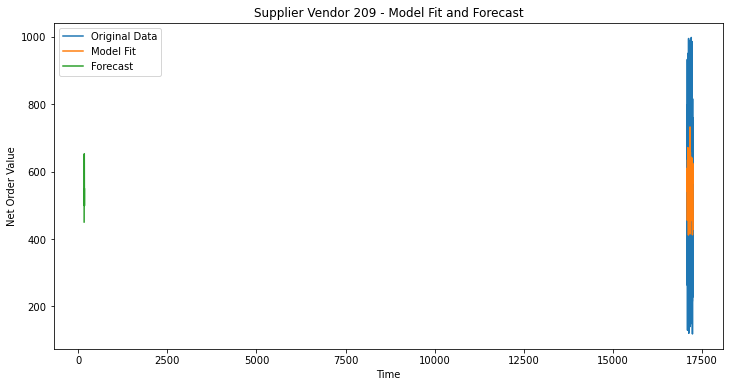

In [11]:
# Plot model fit and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(supplier_data, label='Original Data')
plt.plot(arima_model_fit.fittedvalues, label='Model Fit')
plt.plot(forecast, label='Forecast')
plt.title(f"Supplier {supplier} - Model Fit and Forecast")
plt.xlabel("Time")
plt.ylabel("Net Order Value")
plt.legend()
plt.show()
